<a href="https://colab.research.google.com/github/Lupin3-droid/Lupin3-droid/blob/main/lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('/content/lung_cancer_data.csv')
data.head()

make Age as Classification

In [ ]:
import pandas as pd

# Define age bins and labels
bins = [30, 40, 50, 60, 70, 80]  # Edges of the bins
labels = ['30s', '40s', '50s', '60s', '70s']  # Corresponding labels

# Create a new column for Age Class
data['Age_Class'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)



In [ ]:
age_class_counts = data['Age_Class'].value_counts()
print(age_class_counts)


Age_Class
40s    4836
50s    4799
70s    4700
30s    4686
60s    4637
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_age_class = LabelEncoder()
data['Age_Class'] = le_age_class.fit_transform(data['Age_Class'])

# Step 7: Convert 'Age_Class' to numeric type
data['Age_Class'] = data['Age_Class'].astype(int)

In [ ]:
import pandas as pd
# Define survival month bins and labels
# Define survival month bins and labels
survival_bins = [0, 24, 48, 72, 96, 120, 144]
survival_labels = ['0-2 Years', '2-4 Years', '4-6 Years', '6-8 Years', '8-10 Years', '10-12 Years']

# Create a new column for Survival_Class
data['Survival_Class'] = pd.cut(data['Survival_Months'], bins=survival_bins, labels=survival_labels, right=False)

# Display the modified dataset with the new grouped columns
data[['Smoking_History', 'Tumor_Location', 'Stage', 'Age_Class', 'Survival_Class']].head()


,Smoking_History,Tumor_Location,Stage,Age_Class,Survival_Class
0,Current Smoker,Lower Lobe,Stage III,3,2-4 Years
1,Never Smoked,Lower Lobe,Stage I,2,8-10 Years
2,Former Smoker,Lower Lobe,Stage I,1,4-6 Years
3,Current Smoker,Lower Lobe,Stage III,4,6-8 Years
4,Never Smoked,Lower Lobe,Stage IV,0,8-10 Years


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encoding other categorical variables
le_smoking_history = LabelEncoder()
le_tumor_location = LabelEncoder()
le_stage = LabelEncoder()
le_survival_class = LabelEncoder()

In [ ]:
data['Smoking_History'] = le_smoking_history.fit_transform(data['Smoking_History'])
data['Tumor_Location'] = le_tumor_location.fit_transform(data['Tumor_Location'])
data['Stage'] = le_stage.fit_transform(data['Stage'])
data['Survival_Class'] = le_survival_class.fit_transform(data['Survival_Class'])

Unique values in 'Stage' after mapping:
['Stage III' 'Stage I' 'Stage IV' 'Stage II']


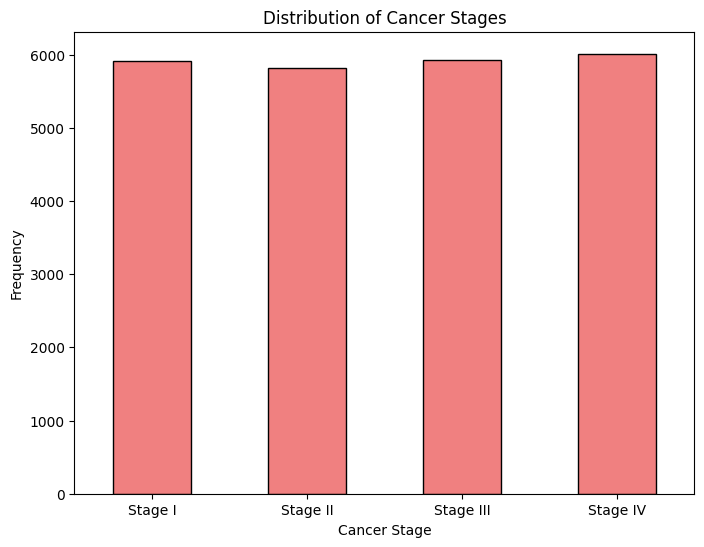

In [ ]:
import matplotlib.pyplot as plt


# Mapping the numeric values in the 'Stage' column to their corresponding stage labels
stage_mapping = {0: "Stage I", 1: "Stage II", 2: "Stage III", 3: "Stage IV"}  # Adjust mapping if needed
data['Stage'] = data['Stage'].map(stage_mapping)

# checking the unique values in the 'Stage' column
print("Unique values in 'Stage' after mapping:")
print(data['Stage'].unique())

# Get the counts of each cancer stage
stage_counts = data['Stage'].value_counts()

# Ensure the categories appear in the desired order
category_order = ["Stage I", "Stage II", "Stage III", "Stage IV"]

# Reindex the counts to make sure categories appear in the desired order
stage_counts = stage_counts[category_order]

# Plot the distribution using a bar chart
stage_counts.plot(kind='bar', color='lightcoral', edgecolor='black', figsize=(8, 6))

# Add title and labels
plt.title('Distribution of Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=0)  # Make sure the x-axis labels are horizontal
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Mapping the numeric values back to the correct labels
smoking_mapping = {0: "Never Smoked", 1: "Current Smoker", 2: "Former Smoker"}
data['Smoking_History'] = data['Smoking_History'].map(smoking_mapping)

# checking the unique values in the 'Smoking_History' column
print("Unique values in 'Smoking_History' after mapping:")
print(data['Smoking_History'].unique())

# Get the counts of each smoking category
smoking_counts = data['Smoking_History'].value_counts()

# Ensure the categories appear in the desired order
category_order = ["Current Smoker", "Never Smoked", "Former Smoker"]


smoking_counts = smoking_counts[category_order]

# Plot the distribution using a bar chart
smoking_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))

# Add title and labels
plt.title('Distribution of Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=0)
plt.show()




Unique values in 'Smoking_History' after mapping:
['Never Smoked']


KeyError: "['Current Smoker', 'Former Smoker'] not in index"

Tumor_Size_mm
(10.003, 32.973]    5915
(32.973, 55.296]    5914
(55.296, 78.19]     5914
(78.19, 99.991]     5915
Name: count, dtype: int64


<ipython-input-11-52cba2417836>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data7 = data.groupby(bins)


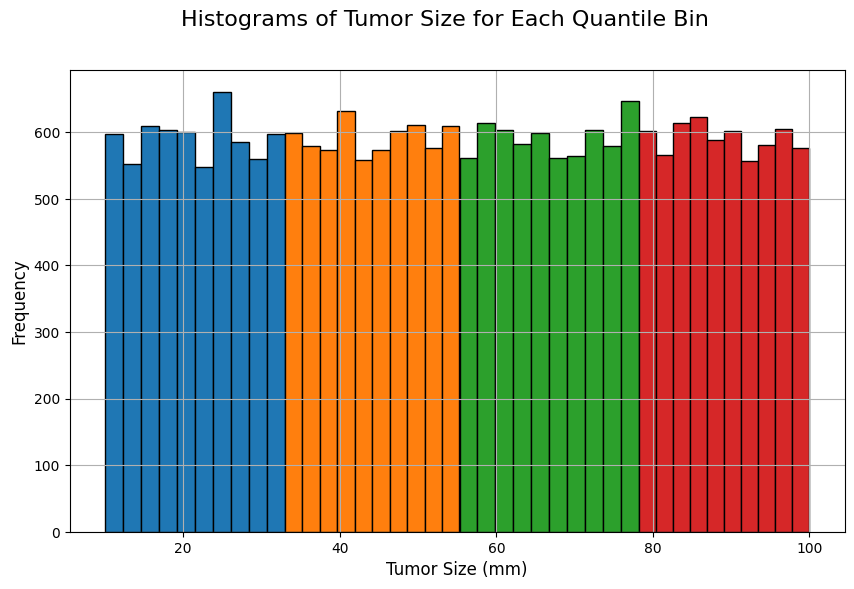

In [ ]:
import matplotlib.pyplot as plt


#  quantile-based bins for 'Tumor_Size_mm'
bins = pd.qcut(data['Tumor_Size_mm'], 4)
print(bins.value_counts(sort=False))  # Display the count of data points in each bin

# Group by the bins
data7 = data.groupby(bins)

#  Plot histograms for each group (bin) in 'Tumor_Size_mm'
data7['Tumor_Size_mm'].hist(bins=10, edgecolor='black', figsize=(10, 6))


plt.suptitle('Histograms of Tumor Size for Each Quantile Bin', fontsize=16)
plt.xlabel('Tumor Size (mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply Label Encoding to 'Smoking_History' column
data['Smoking_History'] = le.fit_transform(data['Smoking_History'])

# Initialize the LabelEncoder
le_stage = LabelEncoder()

# Apply Label Encoding to the 'Stage' column
data['Stage'] = le_stage.fit_transform(data['Stage'])

In [ ]:
# Define survival threshold for the target variable
survival_threshold = 60
data['Survival'] = (data['Survival_Months'] >= survival_threshold).astype(int)

In [ ]:
# Selecting features and target
X = data[['Smoking_History', 'Tumor_Location', 'Stage', 'Age_Class', 'Survival_Class']]
y = data['Survival']

In [ ]:
data['Survival_Class'].head()

,Survival_Class
0,1
1,4
2,2
3,3
4,4


In [ ]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#initialize and train a logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#testing the logistic  regression model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 89.31%


In [ ]:
# Initialize and train the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
model =  DecisionTreeClassifier(
    max_depth=4,            # Limit the maximum depth of the tree
    min_samples_split=50,    # Minimum samples required to split an internal node
    min_samples_leaf=25    )  # Minimum samples required to be a leaf node
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=25, min_samples_split=50)

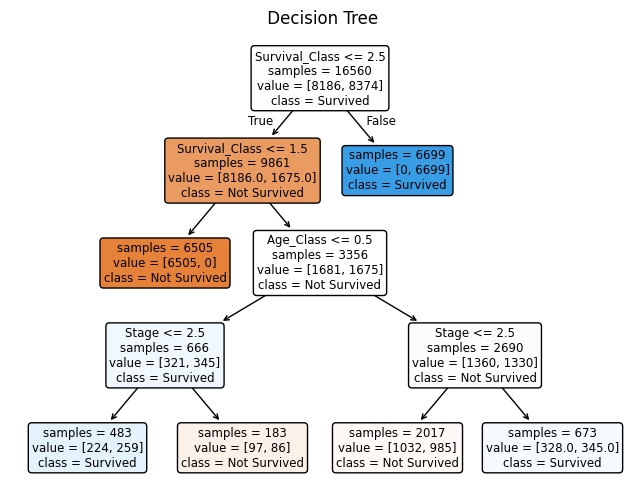

In [ ]:
plt.figure(figsize=(8, 6))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, rounded=True ,impurity=False )
plt.title(" Decision Tree")
plt.show()

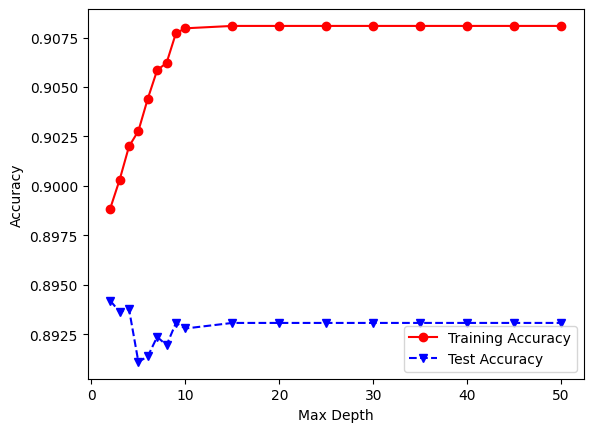

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the maximum depths for testing
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

# Initializing arrays to store accuracy values
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

# Loop through each max_depth value
for depth in maxdepths:
    # Initialize the Decision Tree Classifier with the current max depth
    clf = DecisionTreeClassifier(max_depth=depth)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the training and testing datasets
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)

    # Store accuracy scores for both training and testing data
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)

    # Increment the index for the next depth
    index += 1

# Ploting the training and test accuracies as a function of max_depth
plt.plot(maxdepths, trainAcc, 'ro-', label='Training Accuracy')
plt.plot(maxdepths, testAcc, 'bv--', label='Test Accuracy')

# Add labels and legend to the plot
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

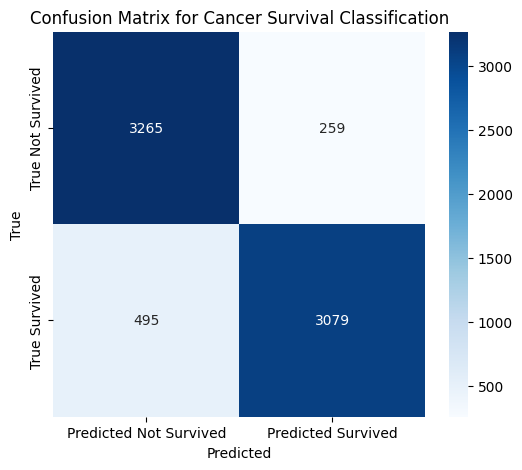

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
#  the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Convert the confusion matrix into a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted Not Survived', 'Predicted Survived'],
                               index=['True Not Survived', 'True Survived'])

# Ploting the confusion matrix using
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Cancer Survival Classification')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# peforming grid tuning to increase the accuracy
# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'ccp_alpha': [0.0, 0.01, 0.05]}
# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1', cv=5)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_



In [ ]:
accuracy = best_model.score(X_test, y_test)
print(f" Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, best_model.predict(X_test)))

 Model Accuracy: 89.93%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89      3524
           1       0.83      1.00      0.91      3574

    accuracy                           0.90      7098
   macro avg       0.92      0.90      0.90      7098
weighted avg       0.92      0.90      0.90      7098

